In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('data_car.csv')

In [3]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## EXPLORATORY DATA ANALYSIS 

In [4]:
#Finding the rows and columns
data.shape

(11914, 16)

In [5]:
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [7]:
data.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

## PREPROCESSING 

### NULL VALUE HANDLING

In [8]:
#The null values are identified in columns Engine Fuel Type,Engine HP,Engine Cylinders,Number of Doors,Market Category

### Distribution Plot 

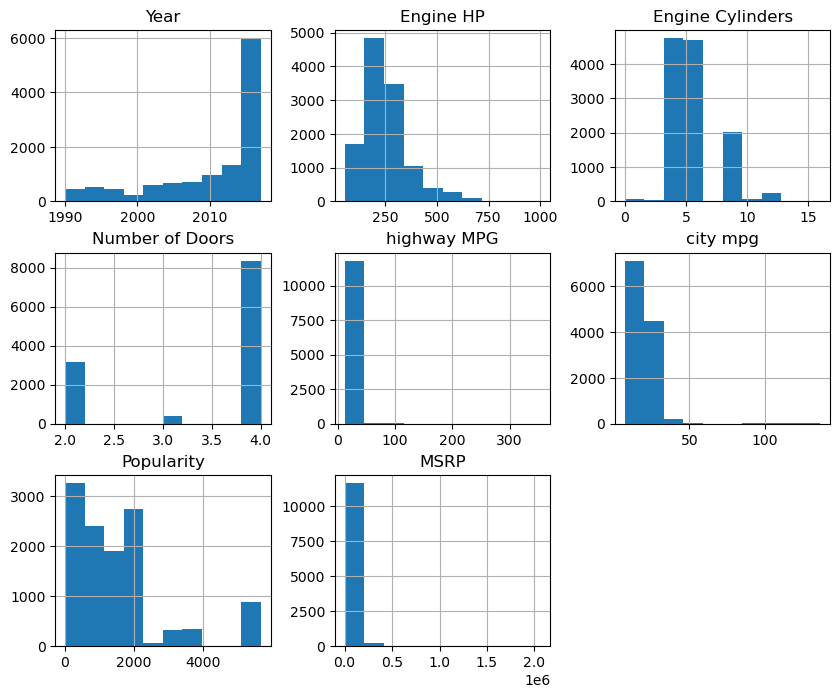

In [9]:
#Distribution plots of the columns

freqgraph=data.select_dtypes(include=['float64','int64'])
freqgraph.hist(figsize=(10,8))
plt.show()

In [10]:
#From the above plot we can find that the columns 'Year' and 'Number of Doors' are left skewed and the columns Engine HP,Engine Engine Cylinders,highway MPG,city mpg,Popularity,MSRP are right skewed.

In [11]:
#We can replace the null values in columns Engine HP,Engine Cylinders,Number of Doors by median as these are numerical values and the null values in columns Engine Fuel Type,Market Category by mode as these are categorical values. 

In [12]:
data['Engine HP']=data['Engine HP'].fillna(data['Engine HP'].median())
data['Engine Cylinders']=data['Engine Cylinders'].fillna(data['Engine Cylinders'].median())
data['Number of Doors']=data['Number of Doors'].fillna(data['Number of Doors'].median())

In [13]:
data['Engine Fuel Type']=data['Engine Fuel Type'].fillna(data['Engine Fuel Type'].mode())
data['Market Category']=data['Market Category'].fillna(data['Market Category'].mode())

In [14]:
data.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP               0
Engine Cylinders        0
Transmission Type       0
Driven_Wheels           0
Number of Doors         0
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

### OUTLIER DETECTION 

In [15]:
#The numerical columns are 'Year','Engine HP','Engine Cylinders','Number of Doors','highway MPG','city mpg','Popularity'
#Checking the unique value in the numerical column

In [16]:
data['Year'].unique()

array([2011, 2012, 2013, 1992, 1993, 1994, 2017, 1991, 2016, 1990, 2015,
       1996, 1997, 1998, 2014, 1999, 2002, 2003, 2004, 1995, 2007, 2008,
       2009, 2001, 2010, 2000, 2005, 2006], dtype=int64)

In [17]:
data['Engine HP'].unique()

array([ 335.,  300.,  230.,  320.,  172.,  160.,  130.,  158.,  240.,
        248.,  162.,  217.,  184.,  295.,  115.,  140.,  155.,  114.,
        100.,  241.,  180.,  177.,  228.,  121.,  148.,  194.,  218.,
        161.,  292.,  250.,  255.,  222.,   82.,  134.,  306.,  400.,
        425.,  350.,  332.,  268.,  282.,  275.,  201.,  442.,  562.,
        597.,  237.,  270.,  445.,  443.,  302.,  322.,  315.,  227.,
        101.,  135.,  485.,  238.,  515.,  543.,  631.,  604.,  620.,
        611.,  661.,  157.,  402.,  389.,  110.,  532.,  170.,  165.,
        125.,  641.,  535.,  153.,  144.,  188.,  372.,  108.,  168.,
        190.,  205.,  200.,  173.,  220.,  210.,  280.,  207.,  265.,
        260.,  290.,  285.,  390.,  225.,  185.,  150.,  430.,  520.,
        560.,  475.,  500.,  540.,  370.,  580.,  420.,  345.,  195.,
        193.,  208.,  181.,  236.,  186.,  252.,  310.,  333.,  340.,
        450.,  281.,  288.,  138.,  137.,  106.,  271.,  196.,  212.,
        278.,  189.,

In [18]:
data['Engine Cylinders'].unique()

array([ 6.,  4.,  5.,  8., 12.,  0., 10.,  3., 16.])

In [19]:
data['Number of Doors'].unique()

array([2., 4., 3.])

In [20]:
data['highway MPG'].unique()

array([ 26,  28,  27,  25,  24,  20,  21,  22,  35,  34,  31,  30,  32,
        33,  23,  36,  29,  45,  43,  40,  42,  19,  18,  17,  15,  37,
        39,  41,  16,  14,  38, 108, 103,  12, 354,  47,  46,  82, 110,
        44,  13, 105,  99, 102, 111, 106,  48, 101,  90,  97,  94,  98,
       100, 107,  53,  50,  74,  92, 109], dtype=int64)

In [21]:
data['city mpg'].unique()

array([ 19,  20,  18,  17,  16,  26,  23,  22,  21,  24,  15,  25,  29,
        28,  32,  31,  30,  14,  10,  27,  12,  13,   9,  11, 122, 121,
         8,  50,  49,  47,  35,  33,  40,  85, 128,  42,  43,  36,  44,
       126,   7,  34, 132, 110, 137, 129,  39,  41, 124,  37,  88,  94,
        86, 101,  95,  89, 102,  98,  92,  97,  91,  53,  55,  51,  54,
        58,  78,  38, 120], dtype=int64)

In [22]:
data['Popularity'].unique()

array([3916, 3105,  819,  617, 1013, 2009,  870,  586,  436, 2774,  113,
       2031,  416,   67,  210, 1715,  376,  549, 1439,  535, 2202,   26,
        481, 5657, 1624, 1720,  520, 1385, 1851, 1158,   61,  640,  873,
          2,  155,  204,   86,  238,  454,  259,  258,  613,  190,  105,
         21,  130, 1391,  820], dtype=int64)

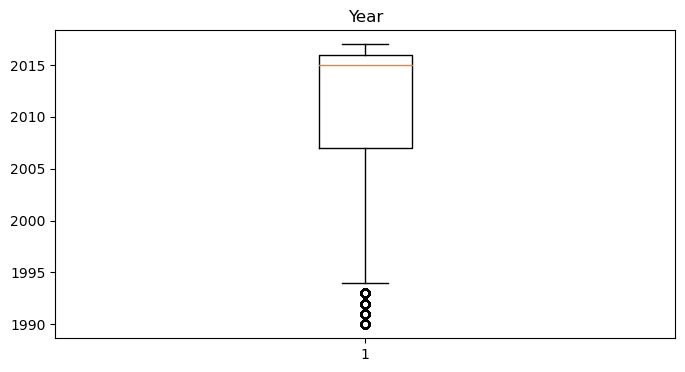

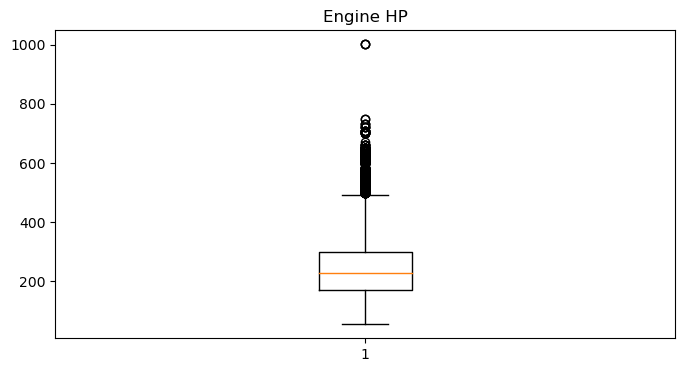

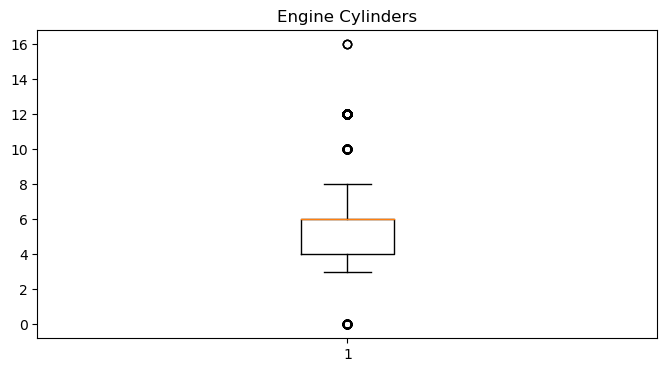

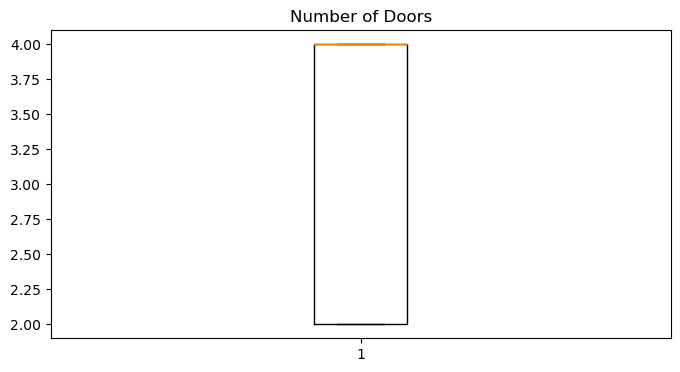

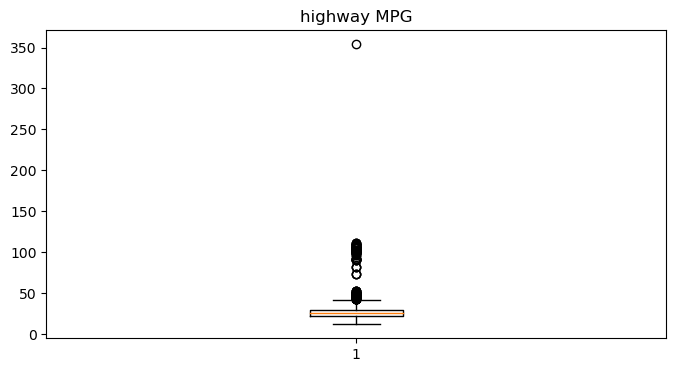

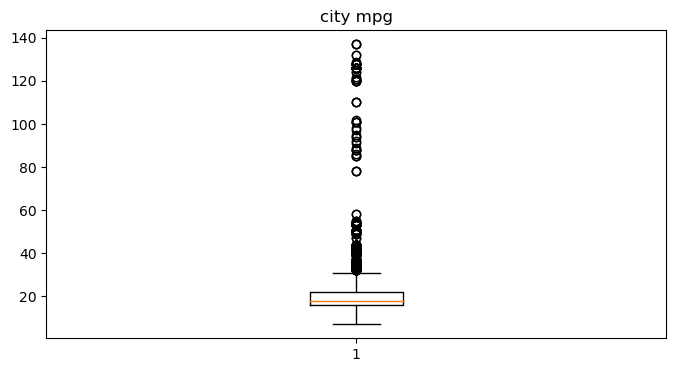

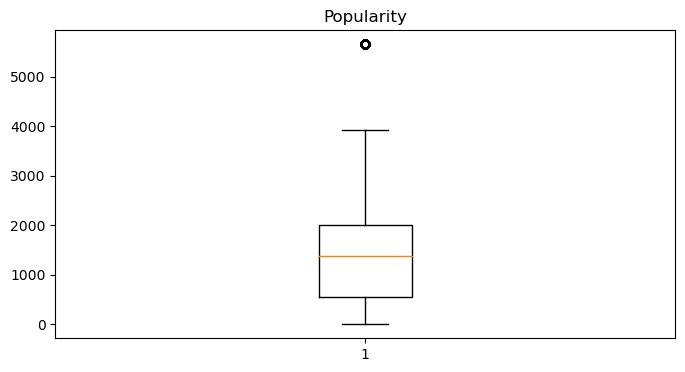

In [23]:
for i in ['Year','Engine HP','Engine Cylinders','Number of Doors','highway MPG','city mpg','Popularity']:
    plt.figure(figsize=(8,4))
    plt.boxplot(x=data[i])
    plt.title(i)
plt.show()

In [24]:
#The outliers are detected in columns 'Engine HP','Engine Cylinders','highway MPG','city mpg','Popularity'.We can replace the outliers by the median of the respective columns.

In [25]:
#Outlier Treatment

#Engine HP

Q1=np.percentile(data['Engine HP'],25,interpolation='midpoint')
Q2=np.percentile(data['Engine HP'],50,interpolation='midpoint')
Q3=np.percentile(data['Engine HP'],75,interpolation='midpoint')

IQR=Q3-Q1

low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR

data.loc[data['Engine HP']<low_limit,'Engine HP']=np.median(data['Engine HP'])
data.loc[data['Engine HP']>up_limit,'Engine HP']=np.median(data['Engine HP'])

print(data.loc[data['Engine HP']<low_limit,'Engine HP'].index)
print(data.loc[data['Engine HP']>up_limit,'Engine HP'].index)

Int64Index([], dtype='int64')
Int64Index([], dtype='int64')


In [26]:
#Engine Cylinders

Q1=np.percentile(data['Engine Cylinders'],25,interpolation='midpoint')
Q2=np.percentile(data['Engine Cylinders'],50,interpolation='midpoint')
Q3=np.percentile(data['Engine Cylinders'],75,interpolation='midpoint')

IQR=Q3-Q1

low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR

data.loc[data['Engine Cylinders']<low_limit,'Engine Cylinders']=np.median(data['Engine Cylinders'])
data.loc[data['Engine Cylinders']>up_limit,'Engine Cylinders']=np.median(data['Engine Cylinders'])

print(data.loc[data['Engine Cylinders']<low_limit,'Engine Cylinders'].index)
print(data.loc[data['Engine Cylinders']>up_limit,'Engine Cylinders'].index)

Int64Index([], dtype='int64')
Int64Index([], dtype='int64')


In [27]:
#highway MPG

Q1=np.percentile(data['highway MPG'],25,interpolation='midpoint')
Q2=np.percentile(data['highway MPG'],50,interpolation='midpoint')
Q3=np.percentile(data['highway MPG'],75,interpolation='midpoint')

IQR=Q3-Q1

low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR

data.loc[data['highway MPG']<low_limit,'highway MPG']=np.median(data['highway MPG'])
data.loc[data['highway MPG']>up_limit,'highway MPG']=np.median(data['highway MPG'])

print(data.loc[data['highway MPG']<low_limit,'highway MPG'].index)
print(data.loc[data['highway MPG']>up_limit,'highway MPG'].index)

Int64Index([], dtype='int64')
Int64Index([], dtype='int64')


In [28]:
#city mpg

Q1=np.percentile(data['city mpg'],25,interpolation='midpoint')
Q2=np.percentile(data['city mpg'],50,interpolation='midpoint')
Q3=np.percentile(data['city mpg'],75,interpolation='midpoint')

IQR=Q3-Q1

low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR

data.loc[data['city mpg']<low_limit,'city mpg']=np.median(data['city mpg'])
data.loc[data['city mpg']>up_limit,'city mpg']=np.median(data['city mpg'])

print(data.loc[data['city mpg']<low_limit,'city mpg'].index)
print(data.loc[data['city mpg']>up_limit,'city mpg'].index)

Int64Index([], dtype='int64')
Int64Index([], dtype='int64')


In [29]:
#Popularity

Q1=np.percentile(data['Popularity'],25,interpolation='midpoint')
Q2=np.percentile(data['Popularity'],50,interpolation='midpoint')
Q3=np.percentile(data['Popularity'],75,interpolation='midpoint')

IQR=Q3-Q1

low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR

data.loc[data['Popularity']<low_limit,'Popularity']=np.median(data['Popularity'])
data.loc[data['Popularity']>up_limit,'Popularity']=np.median(data['Popularity'])

print(data.loc[data['Popularity']<low_limit,'Popularity'].index)
print(data.loc[data['Popularity']>up_limit,'Popularity'].index)

Int64Index([], dtype='int64')
Int64Index([], dtype='int64')


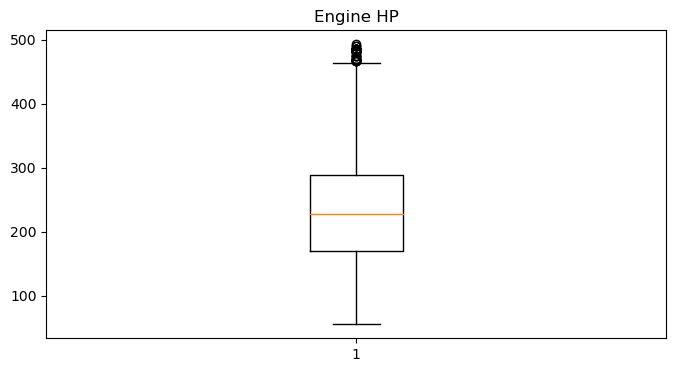

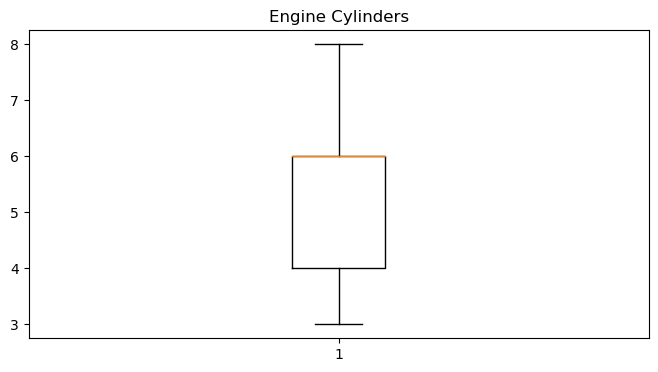

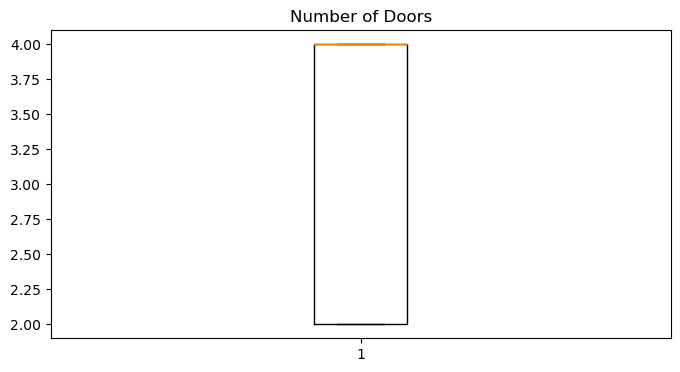

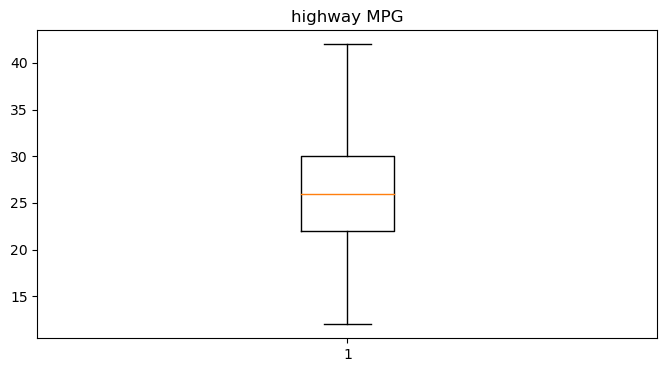

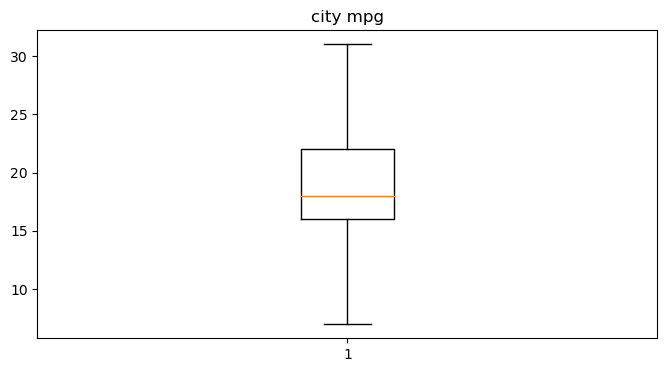

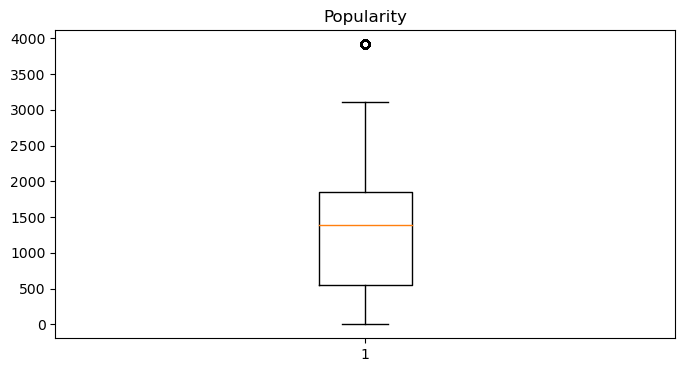

In [30]:
#Plotting the boxplot to check whether the outliers are removed or not
for i in ['Engine HP','Engine Cylinders','Number of Doors','highway MPG','city mpg','Popularity']:
    plt.figure(figsize=(8,4))
    plt.boxplot(x=data[i])
    plt.title(i)
plt.show()

### ENCODING 

In [31]:
#Since our feature columns contain categorical data, we have to encode the feature columns and we are using Label Encoder.
#The categorical columns are Make,Model,Engine Fuel Type,Transmission Type,Driven_Wheels,Market Category,Vehicle Size,Vehicle Style

In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [34]:
data['Make']=le.fit_transform(data['Make'])
data['Model']=le.fit_transform(data['Model'])
data['Engine Fuel Type']=le.fit_transform(data['Engine Fuel Type'])
data['Transmission Type']=le.fit_transform(data['Transmission Type'])
data['Driven_Wheels']=le.fit_transform(data['Driven_Wheels'])
data['Market Category']=le.fit_transform(data['Market Category'])
data['Vehicle Size']=le.fit_transform(data['Vehicle Size'])
data['Vehicle Style']=le.fit_transform(data['Vehicle Style'])

#### CORRELATION

In [35]:
corrmatrix=data[['Year','Engine HP','Engine Cylinders','Number of Doors','highway MPG','city mpg','Popularity','MSRP']].corr()

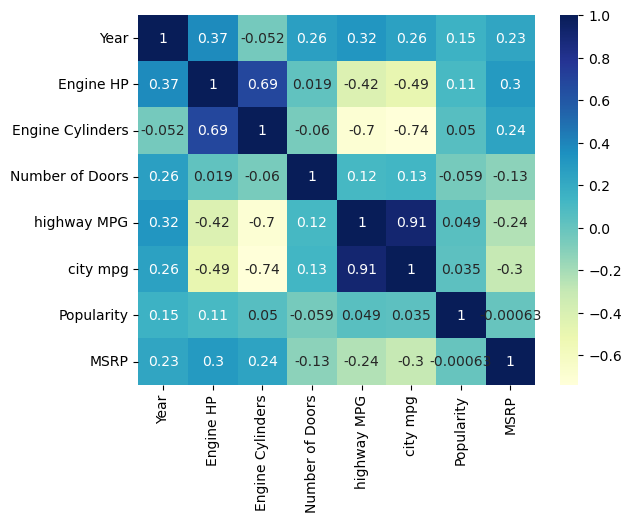

In [36]:
sns.heatmap(corrmatrix,annot=True,cmap='YlGnBu')
plt.show()

In [ ]:
#From the above figure, the most positively correlated columns are 'highway MPG' and'city mpg' having a correlation of 0.91
#With the target column 'MSRP', 'Engine HP' column is highly positively correlated with correlation of 0.31

In [37]:
#Splitting the data

x=data.drop(['MSRP'],axis=1)
y=data['MSRP']

In [38]:
#Splitting data to training and testing set

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

## MODELLING

In [39]:
#Since our target column is a numerical column we can use regression for modelling. The Regression methods that we use are Linear Regression and Lasso Regression.

### LINEAR REGRESSION 

In [40]:
from sklearn.linear_model import LinearRegression
#Creating an instance of Linear Regression
lr=LinearRegression()
model_lr=lr.fit(x_train,y_train)

In [41]:
#The predicted target feature
y_pred_lr=model_lr.predict(x_test)

In [42]:
print(y_pred_lr)

[36609.38252079 13532.15213676 38357.45723727 ... 35899.92633766
 36098.98631875 12767.50536527]


In [43]:
#Calculating the metrics

from sklearn.metrics import mean_squared_error,r2_score

print('MSE=',mean_squared_error(y_test,y_pred_lr))
print('r2 score=',r2_score(y_test,y_pred_lr))

MSE= 2904276102.136597
r2 score= 0.2364128637245202


### LASSO REGRESSION

In [44]:
from sklearn.linear_model import Lasso
#Creating an instance of Lasso Regression
lasso=Lasso(alpha=1.0)
model_la=lasso.fit(x_train,y_train)

In [45]:
#The predicted target feature
y_pred_lasso=model_la.predict(x_test)

In [46]:
print(y_pred_lasso)

[36610.82404409 13532.35028399 38357.64977398 ... 35904.42142282
 36097.96296959 12763.96279319]


In [47]:
#Calculating the metrics

print('MSE=',mean_squared_error(y_test,y_pred_lasso))
print('r2 score=',r2_score(y_test,y_pred_lasso))

MSE= 2904263671.898367
r2 score= 0.2364161318607716
